
## PREDICTING IN-VEHICLE COUPON ACCEPTANCE TO DRIVE TARGETED PROMOTIONS

### 1. Business Understanding

The objective of this project is to build a classification model that predicts whether a passenger will accept a digital coupon recommendation while being driven somewhere, based on contextual (e.g., time of day, weather, who they are with, their current destination) and personal factors (e.g., age, gender, income level, frequency of visits to places like coffeehouses or restaurants). This model uses data from the **In-Vehicle Coupon Recommendation dataset**.

#### **Real-World Problem:**

In the competitive retail and food service industries, many businesses rely on digital marketing and promotions to attract and retain customers. However, **sending the same offer to everyone often results in low engagement**, wasted marketing budget, and customer fatigue. Businesses face the challenge of **delivering the right offer to the right person at the right time**, especially in contexts like ride-hailing or navigation apps, where offers can be embedded during a user’s journey.

This project addresses the challenge of optimizing coupon distribution to increase conversion rates (i.e., offer acceptance) while reducing wasted promotions.

#### **Stakeholders:**

The primary stakeholder is a **digital marketing team at Uber company**. The company often partners with restaurants, cafes, and retailers to promote location-specific offers to users while they are in transit.

Secondary stakeholders include:

* **Restaurants and businesses** that want to increase food traffic and sales by targeting likely customers.
* **Product managers and data teams** who implement personalized in-app experiences based on user behavior and context.
* **Customers**, who benefit from receiving more relevant and timely offers that suit their preferences and situations.


By accurately predicting coupon acceptance, the model enables:

* **Targeted marketing**: Only users who are likely to redeem a coupon will receive it, increasing the return on investment for marketing campaigns.
* **Improved customer engagement**: Users receive offers that match their preferences and context, making them more likely to interact with the platform.
* **Cost efficiency**: Reduces unnecessary offer distribution, saving businesses from paying for ineffective promotions.
* **Data-driven strategy**: Allows marketing teams to use predictive analytics for smarter decision-making.



This project presents a practical machine learning solution to a real-world marketing problem: predicting whether a customer will accept an offer based on personal and situational data. It provides direct value to digital marketing and product teams by improving personalization strategies in mobile apps and platforms. If implemented, the model could enhance user satisfaction, increase coupon redemption rates, and lead to more effective partnerships between platforms and local businesses.


### 2. Data Understanding

The dataset used is In-Vehicle Coupon Recommendation Dataset from: https://archive.ics.uci.edu/dataset/603/in+vehicle+coupon+recommendation.
It mimics actual marketing situations in which a consumer is given different promotional offers (coupons) while commuting in a car. The dataset, which combines user demographics, behavioral indications, and contextual characteristics, was created to replicate contextual marketing scenarios. As such, it is extremely useful for developing real-time, personalized offer system.

**Relevance to stakeholders:** A digital marketing team at a ride-sharing company like Uber, which regularly partners with establishments (restaurants, cafes, and retail stores) to offer time-sensitive promotions, would find this data quite useful. By understanding which contextual and personal factors drive coupon acceptance, marketers can optimize when and to whom offers are shown, reducing marketing waste and increasing conversion rates.



In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')
df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [4]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


**Why the Data is Suitable**

1. Behavioral targeting: Includes user history with places like bars and coffee shops which is helpful for identifying likely responders.

2. Contextual awareness: The dataset mimics real-time ride conditions (weather, destination, time), aligning perfectly with Uber's real-world operations.

3. Diverse coupon types: Supports different business use cases for Uber partners.

4. Binary target: The Y variable allows straightforward training of classification models for coupon acceptance.

**Limitations of the data**

1. Simulated responses: The dataset is based on a hypothetical scenario, not real user data, which may introduce bias.

2. Missing values: Some features have missing values that require careful imputation or removal.

3. Imbalanced classes: There may be a skew toward either acceptance or rejection, affecting model performance and requiring techniques like resampling or class weighting.

### 3. Data Preparation

**Missing Values**

Checking for missing values in the data

In [5]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Filling the null values in the car category with 'Unknown'


In [6]:
df['car'].fillna('Unknown', inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12980\101890491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['car'].fillna('Unknown', inplace=True)


In [7]:
cols_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
df[cols_to_fill] = df[cols_to_fill].fillna('never')


In [8]:
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

**Convert time to Numeric (24-Hour Format)**

In [9]:
df['time_dt'] = pd.to_datetime(df['time'], format='%I%p')

# Extract the hour directly from the datetime column
df['hour'] = df['time_dt'].dt.hour

# Drop unnecessary columns
df.drop(columns=['time', 'time_dt'], inplace=True)


In [10]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,hour
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,4~8,1~3,1,0,0,0,1,1,14
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,4~8,1~3,1,0,0,0,1,0,10
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,4~8,1~3,1,1,0,0,1,1,10
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,4~8,1~3,1,1,0,0,1,0,14
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,4~8,1~3,1,1,0,0,1,0,14


## Exploratory Data Analysis(EDA)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


 ***1. Are people more likely to accept coupons when they are with friends?***

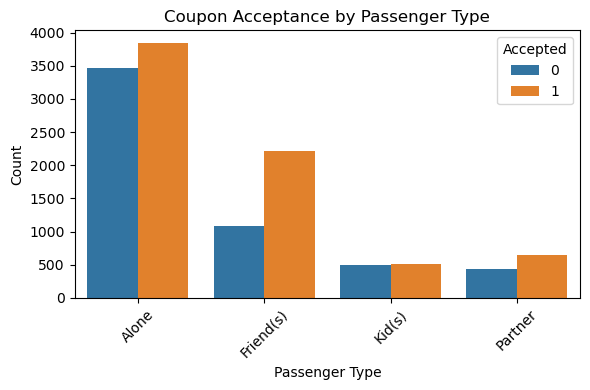

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='passanger', hue='Y')
plt.title('Coupon Acceptance by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Count')
plt.legend(title='Accepted')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the visualization above, people are more likely to accept coupons when they are alone.

 ***2. Do income levels influence coupon acceptance?***

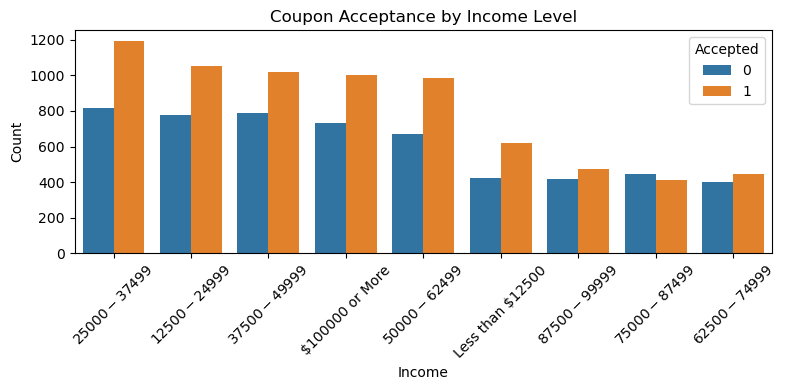

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='income', hue='Y', order=df['income'].value_counts().index)
plt.title('Coupon Acceptance by Income Level')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Accepted')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Coupon acceptance varies accross different income levels and therfore cannot be determined by just income alone.

 ***3. Which coupon types are most accepted overall?***

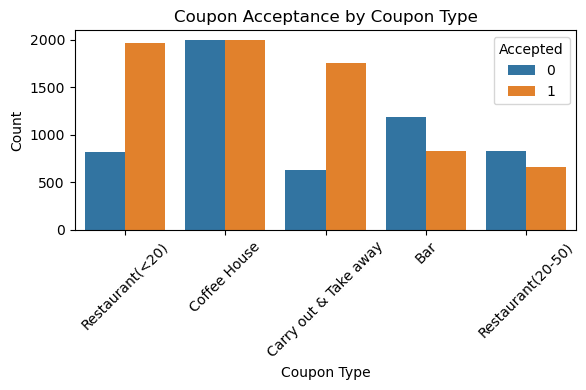

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='coupon', hue='Y')
plt.title('Coupon Acceptance by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.legend(title='Accepted')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Coffee House coupons are more accepted followed by Restaurant(<29) coupons. 

***4. Coupon acceptance by education***

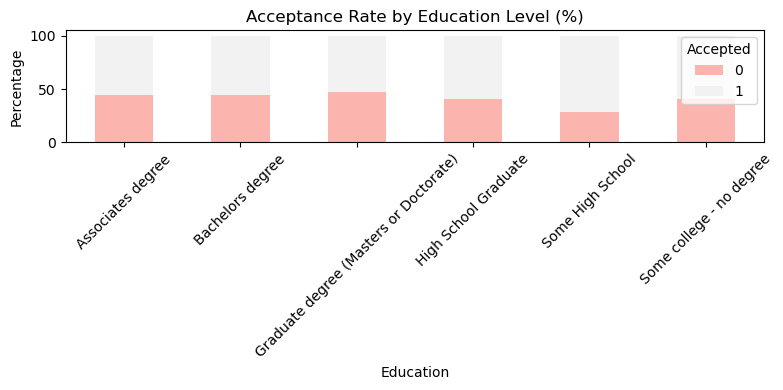

In [15]:
edu_coupon = pd.crosstab(df['education'], df['Y'], normalize='index') * 100
edu_coupon.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Pastel1')
plt.title('Acceptance Rate by Education Level (%)')
plt.ylabel('Percentage')
plt.xlabel('Education')
plt.legend(title='Accepted')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Coupon acceptance rate varies across different education levels and therefore cannot be predicted using education level only.

***5. What time of day sees more coupon acceptance?***

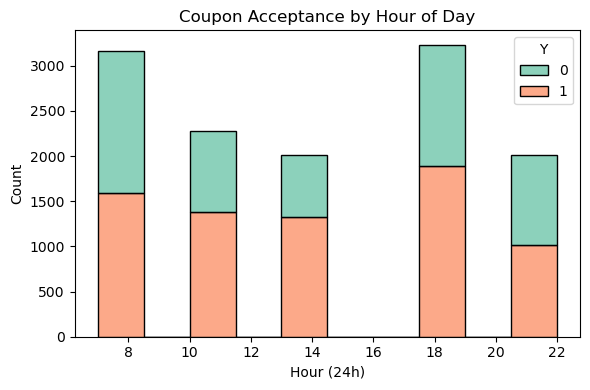

In [16]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='hour', hue='Y', bins=10, multiple='stack', palette='Set2')
plt.title('Coupon Acceptance by Hour of Day')
plt.xlabel('Hour (24h)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Customers are more likely to accept coupons arount 6pm(18.00)

***6. Correlation Heatmap (for numeric features only)***

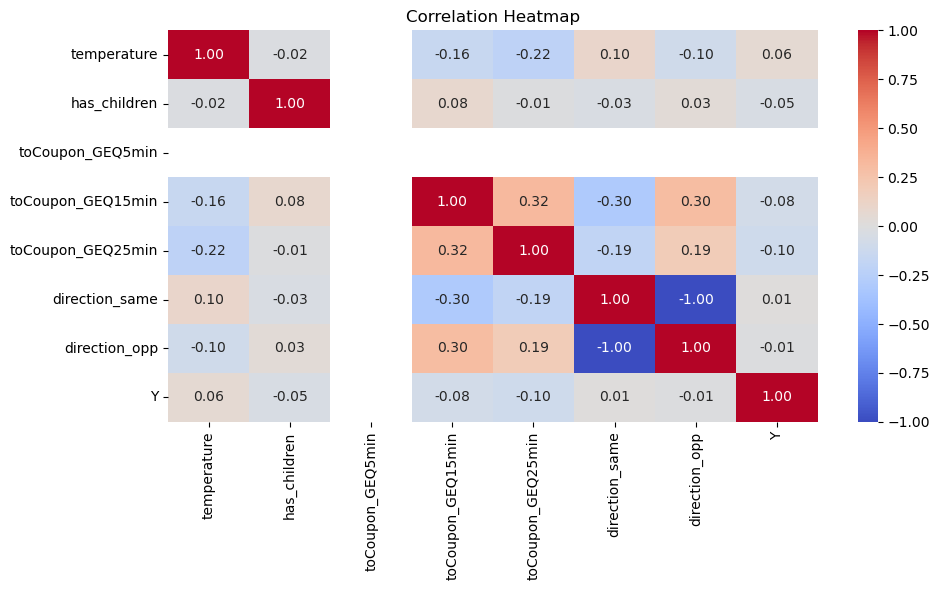

In [17]:
# Select numeric features for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


**Feature Engineering**

The feature types in this dataset are numerical features and catogorical(norminal and ordinal) features.

Feature engineering will be used to normalize behavioral frequencies. Some features (e.g., CoffeeHouse, Bar, Restaurant20To50) have values, "1~3", "4~8" which will be mapped to approximate numeric values (e.g. "less than 1" = 0.5, "1~3")

***Binning Continuous Variables (e.g., age, temperature)***

Binning continuous variables transforms raw data into business-relevant segments, captures non-linear behavior, reduces noise, and improves interpretability—helping both the model and human decision-makers.

In [18]:
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')

def bin_temperature(temp):
    if pd.isna(temp):
        return 'Unknown'
    elif temp < 50:
        return 'Cold'
    elif 50 <= temp < 70:
        return 'Mild'
    else:
        return 'Warm'

df['temp_binned'] = df['temperature'].apply(bin_temperature)


In [19]:
df[~df['age'].astype(str).str.isnumeric()]['age'].value_counts()


age
50plus     1788
below21     547
Name: count, dtype: int64

In [20]:
# Custom mapping for age ranges
age_map = {
    'below21': 18,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 55
 }

df['age'] = df['age'].replace(age_map)
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Now this will succeed

def bin_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 25:
        return 'Under 25'
    elif 25 <= age < 35:
        return '25-34'
    elif 35 <= age < 50:
        return '35-49'
    else:
        return '50+'

df['age_binned'] = df['age'].apply(bin_age)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12980\4168093873.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace(age_map)


Creating interactive features

The code below creates interaction features that help the model learn how combinations of conditions (like passenger type + coupon or weather + coupon) influence a user's decision. It captures contextual behavior more realistically.

In [21]:
# Passenger × Coupon interaction
df['passenger_coupon'] = df['passanger'] + '_' + df['coupon']

# Weather × Coupon interaction
df['weather_coupon'] = df['weather'] + '_' + df['coupon']


In [22]:
def time_of_day(hour):
    if 6 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 14:
        return 'Lunch'
    elif 14 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(time_of_day)


In [23]:
freq_map = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10,
    'NaN': 0
}

for col in ['RestaurantLessThan20', 'Restaurant20To50']:
    df[col] = df[col].replace(freq_map)
    df[col] = df[col].astype(float)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12980\2896092376.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(freq_map)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12980\2896092376.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(freq_map)


In [24]:
df.dtypes

destination              object
passanger                object
weather                  object
temperature               int64
coupon                   object
expiration               object
gender                   object
age                       int64
maritalStatus            object
has_children              int64
education                object
occupation               object
income                   object
car                      object
Bar                      object
CoffeeHouse              object
CarryAway                object
RestaurantLessThan20    float64
Restaurant20To50        float64
toCoupon_GEQ5min          int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
direction_opp             int64
Y                         int64
hour                      int32
temp_binned              object
age_binned               object
passenger_coupon         object
weather_coupon           object
time_of_day              object
dtype: o

**Identifying Input and Target columns**

Y is the target column. Y (binary), represents if the passenger will accept (Y=1) or reject (Y=0) the coupon.

The Input features are: 1. Trip context: destination, passenger type, weather, temperature, time.

2. Coupon information: type of coupon, expiration, time needed to reach coupon place.

3. Passenger demographics: gender, age, marital status, children, education, occupation, income, car ownership.

4. Behavioral indicators: frequency of visits to bar, coffee house, carry-away food, restaurants.

In [25]:
X = df.drop(columns=['Y'], axis=1)
y = df['Y']                


The code below splits the dataset into training and testing sets:

X_train, y_train: Used to train the model (80% of the data)

X_test, y_test: Used to evaluate the model’s performance on unseen data (20%)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
# Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


### 4. Modeling

#### 1. Logistic Regression

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])


***Fit the model and predict on test set***

In [29]:
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)


***Interpreting Feature Importance in Logistic Regression***

In [30]:
logreg_model = model_pipeline.named_steps['classifier']
feature_names = preprocessor.get_feature_names_out()
coefficients = logreg_model.coef_[0]

# Create DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))  

                                               Feature  Coefficient
120                                    cat__car_Mazda5     0.958061
119  cat__car_Car that is too old to install Onstar :D     0.916176
157                   cat__passenger_coupon_Kid(s)_Bar    -0.709127
83                     cat__education_Some High School     0.699780
66                   cat__coupon_Carry out & Take away     0.613899
65                                     cat__coupon_Bar    -0.597579
134                             cat__CoffeeHouse_never    -0.594964
123                                 cat__car_crossover    -0.587237
121                    cat__car_Scooter and motorcycle    -0.582952
181          cat__weather_coupon_Sunny_Restaurant(<20)     0.581730


### Evaluation

              precision    recall  f1-score   support

           0       0.63      0.68      0.65      1128
           1       0.72      0.68      0.70      1409

    accuracy                           0.68      2537
   macro avg       0.68      0.68      0.68      2537
weighted avg       0.68      0.68      0.68      2537



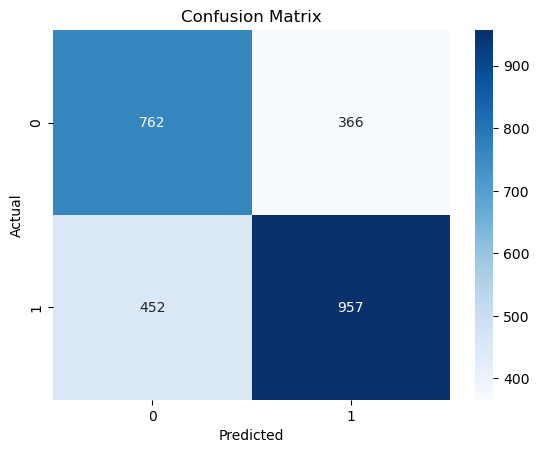

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The Logistic Regression classifier achieved an overall accuracy of ***68%***.

**1. Class 0: Coupon Rejected**

 - Precision = 0.63: When the model predicted a user would reject the coupon, it was correct ***63%*** of the time.

 - Recall = 0.68: It correctly identified ***68%*** of all actual coupon rejections.

 - F1-score = 0.65: Indicates a reasonably balanced performance, slightly favoring recall over precision.

**2. Class 1: Coupon Accepted**

 - Precision = 0.72: When the model predicted acceptance, it was correct ***72%*** of the time.

 - Recall = 0.68: It correctly identified ***68%*** of the people who actually accepted the coupon.

 - F1-score = 0.70: Shows strong and balanced performance for the business-relevant class (acceptance).

The model performs better at predicting acceptance (Class 1), which is valuable for marketing teams aiming to optimize targeting.

**ROC Curve & AUC (for binary classification)**

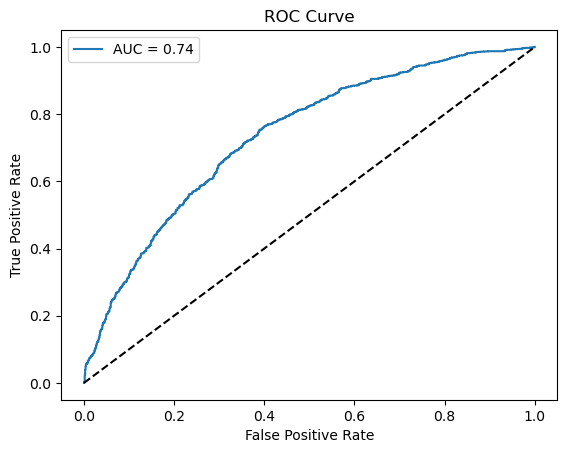

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model_pipeline.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**AUC = 0.74** meaning the model has good discrimination ability as it can distinguish between coupon accepters and rejecters ***74%*** of the time.

The curve is above the diagonal baseline, indicating better than random performance.

The closer the curve gets to the top-left corner, the better the model is at maximizing true positives while minimizing false positives.

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.6775719353567206
Precision: 0.7233560090702947
Recall: 0.6792051100070973
F1 Score: 0.7005856515373353


#### Decision Tree

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # reuse the preprocessor from earlier
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the model
tree_pipeline.fit(X_train, y_train)

# Predict
y_pred_tree = tree_pipeline.predict(X_test)


Decision Tree Performance:
Accuracy: 0.6669
Precision: 0.6939
Recall: 0.7161
F1 Score: 0.7049

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62      1128
           1       0.69      0.72      0.70      1409

    accuracy                           0.67      2537
   macro avg       0.66      0.66      0.66      2537
weighted avg       0.67      0.67      0.67      2537



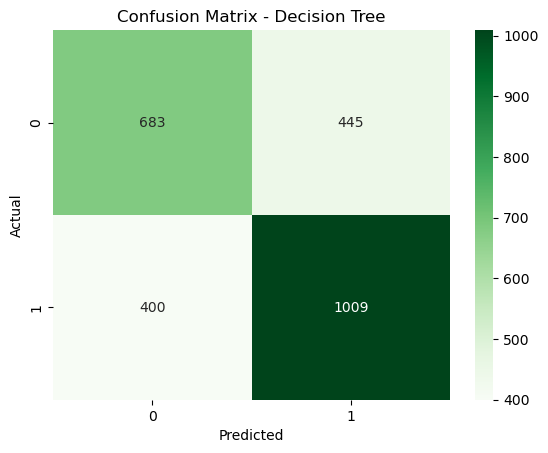

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


The Decision Tree classifier achieved an overall accuracy of ***66.7%***.

**1. Class 0: Coupon Rejected**
   
 - Precision = 0.63: When the model predicted "rejected," it was correct ***63%*** of the time.

 - Recall = 0.61: Out of all the people who actually rejected the coupon, ***61%*** were correctly identified.

 - F1-score = 0.62: Indicates moderate performance, with fairly balanced precision and recall.

**2. Class 1: Coupon Accepted**

 - Precision = 0.69: When the model predicted "accepted," it was correct ***69%*** of the time.

 - Recall = 0.72: The model correctly identified ***72%*** of the actual acceptances.

 - F1-score = 0.70: A solid score, suggesting the model is more reliable when predicting acceptance.

The model performs better on Class 1 (coupon acceptance) than Class 0, which aligns well with business goals like targeted marketing and customer conversion.

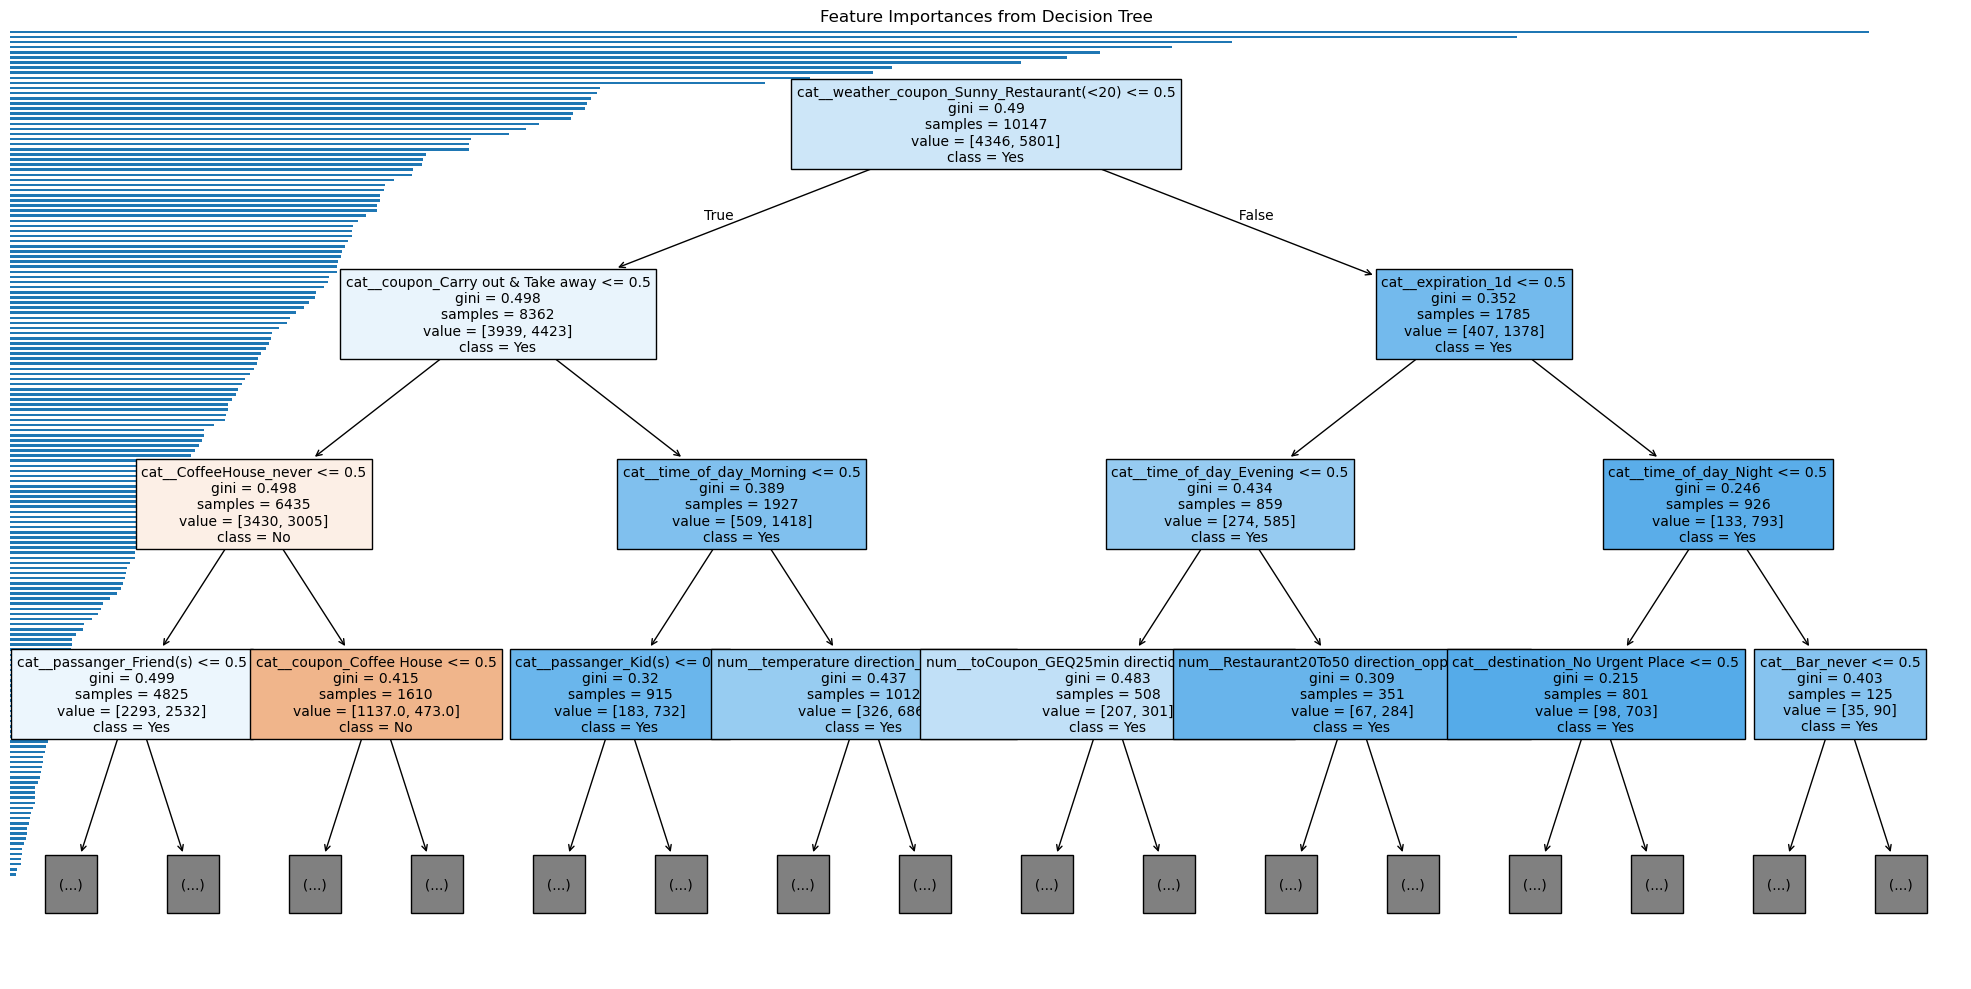

In [36]:
from sklearn.tree import plot_tree

# Access the trained decision tree model from the pipeline
dt_model = tree_pipeline.named_steps['classifier']

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=['No', 'Yes'], max_depth=3, fontsize=10)
importances = dt_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
importances_series = pd.Series(importances, index=feature_names).sort_values(ascending=True)
importances_series.plot(kind='barh')
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Ensemble Model: Random Forest**

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.64      0.68      1128
           1       0.73      0.79      0.76      1409

    accuracy                           0.73      2537
   macro avg       0.72      0.72      0.72      2537
weighted avg       0.73      0.73      0.72      2537

Confusion Matrix:
[[ 724  404]
 [ 291 1118]]


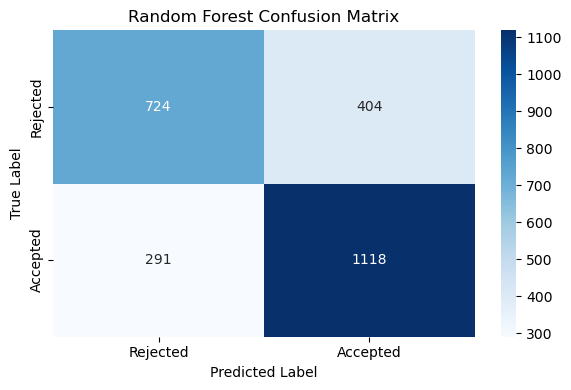

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)

# confusion matrix plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Accepted'], yticklabels=['Rejected', 'Accepted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

The Random Forest classifier achieved an overall accuracy of 73%, indicating it makes correct predictions in roughly three out of four cases.

**1. Class 0: Coupon Rejected**
 
 - Precision = 0.71: When the model predicted "rejected," it was correct 71% of the time.

 - Recall = 0.64: Out of all the people who actually rejected the coupon, the model correctly identified 64%.

 - F1-score = 0.68: This reflects a balance between precision and recall for this class.

**2. Class 1: Coupon Accepted**
 
 - Precision = 0.73: When the model predicted "accepted," it was correct 73% of the time.

 - Recall = 0.79: The model correctly identified 79% of those who accepted the coupon — a strong recall score.

 - F1-score = 0.76: Shows a high and consistent performance for predicting coupon acceptance.

The model is better at predicting coupon acceptance (Class 1) than rejection (Class 0). This makes it valuable for marketing teams aiming to target likely converters with offers.

The relatively lower recall on Class 0 means some uninterested users may still receive offers, but overall waste is minimized compared to random targeting.